# Gradient descent

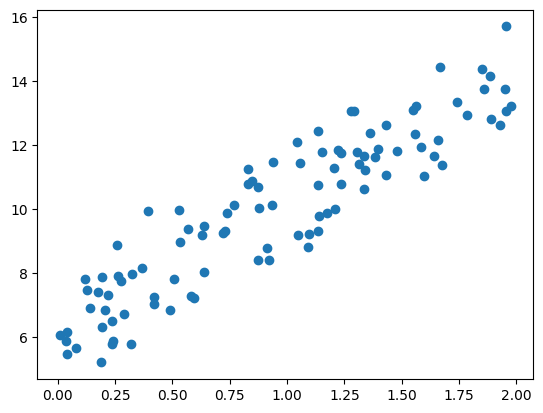

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)#.rand()0과 1사이의 값
y = 6 + 4 * X + np.random.randn(100,1) #np.random.randn(100,1) 에러

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))



* w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함



In [3]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

## 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        print(f"x절편: {w1}, y절편: {w0}")      
    return w1, w0

## 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

NameError: name 'get_weight_updates' is not defined

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred, color='red')

# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# 회귀분석에서 보스턴 주택 집값 예측

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [7]:
data.shape

(506, 13)

In [8]:
target.shape

(506,)

In [9]:
X = data
y = target

In [10]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3, random_state=156)

In [11]:
print(X_train)
print()
print(y_train)


[[2.19770e-01 0.00000e+00 6.91000e+00 ... 1.79000e+01 3.96900e+02
  1.62000e+01]
 [7.25800e-01 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.90950e+02
  1.12800e+01]
 [5.34120e-01 2.00000e+01 3.97000e+00 ... 1.30000e+01 3.88370e+02
  7.26000e+00]
 ...
 [7.35341e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.64500e+01
  2.06200e+01]
 [2.00900e-02 9.50000e+01 2.68000e+00 ... 1.47000e+01 3.90550e+02
  2.88000e+00]
 [1.22690e-01 0.00000e+00 6.91000e+00 ... 1.79000e+01 3.89390e+02
  9.55000e+00]]

[19.4 18.2 43.1 23.9 22.8 17.2 27.1 30.7 39.8 13.1 17.9 20.  23.1  8.8
 31.1 31.6 16.6 20.9 29.8 14.9 50.  21.7 21.  29.1 22.2 20.4 29.4 23.
 31.5 17.1 23.6 18.8 22.9 19.9 17.4 17.4 15.  32.9  8.4 24.8 22.9 10.2
 15.  27.5 25.   8.7 30.5 26.6 18.9 20.7 23.1 23.2 33.  50.  18.5 19.8
 14.1 22.7 50.  19.8 24.8 24.4 20.5 24.3 22.6 13.1 21.7 20.2 19.9 23.7
 24.5 44.8 16.6  7.5 19.4 15.2 16.3 13.2 50.  44.  27.  20.1 22.   8.3
 13.8 18.4 22.4 21.  32.2 24.4 15.7 37.2 16.7 22.8 19.2 23.8 20.  12.3
 18.  19.5 

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [14]:
#다중회귀 y 절편
lr.intercept_

40.995595172164236

In [15]:
#다중회귀 기울기
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [16]:
X_rm = np.round(X_train[:,[5]])


In [17]:
lr = LinearRegression()
lr.fit(X_rm, y_train)
pred = lr.predict(X_test[:,[5]])
pred

array([20.46248403, 19.40428355, 30.92691106, 24.1997794 , 26.89567112,
       23.61189024, 22.15896418, 15.28905944, 12.70234714, 20.5968587 ,
       24.86325431, 19.82420438, 25.88786113, 39.6696627 , 21.05877161,
       24.00661582, 28.92808792, 18.38807515, 25.62751022, 20.83201436,
       22.72165809, 20.17693787, 18.33768465, 18.67362131, 28.78531484,
        9.47735518, 21.6634576 , 12.17324689, 17.48104616, 15.8769486 ,
       25.75348646, 24.6532939 , 20.37010145, 20.99158428, 22.54529134,
       26.08102471, 16.90155542, 26.31618037, 18.35448148, 23.53630449,
       30.09546782, 24.44333348, 25.37555772,  8.36036578, 24.61130181,
       20.48767928, 28.83570534, 34.95815101, 22.7300565 , 22.88962642,
       25.79547855, 40.08958352, 35.93236733, 26.29938354, 26.90406953,
       23.80505382, 24.95563689, 32.65698487, 21.97419901, 17.1451095 ,
       19.74022021, 25.13200364, 22.85603275, 14.72636553, 18.79959756,
       33.14409303, 30.6917554 , 22.57048659, 27.71871594, 20.68

In [18]:
#선형회귀 y 절편
lr.intercept_

-29.592078633847343

In [19]:
#선형회귀 기울기
lr.coef_

array([8.39841656])

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
mean_squared_error(y_test, pred)

35.43276154614645

In [22]:
mean_absolute_error(y_test, pred)

4.058049278828864

In [23]:
r2_score(y_test, pred)

0.5026777303764689

# 다중회귀로 cross validation 적용하기

In [26]:
from sklearn.model_selection import cross_val_score

neg_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
neg_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [28]:
#RMSE는 -1값을 원래의 평자 지표에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다.
np.mean(np.sqrt(neg_scores*-1))

5.828658946215815

# Polynomial features 다항회귀 

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [34]:
poly = PolynomialFeatures(degree=2)
ploy_ftr = poly.fit_transform(X)

In [35]:
ploy_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [36]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [37]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


# 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

* 사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# 다항 회귀를 이용한 과소적합 및 과적합 이해

* cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

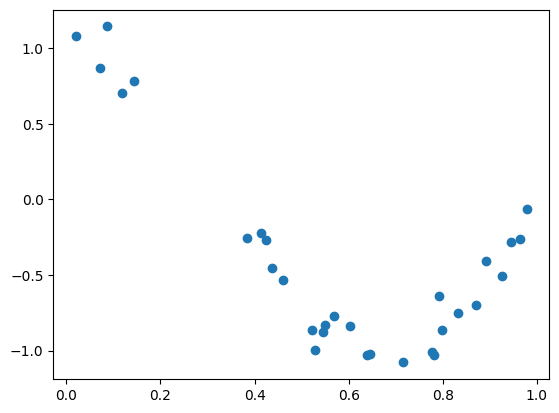

In [44]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232012 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899460e+05 -1.87416299e+06  2.03716455e+07
 -1.44873481e+08  7.09316469e+08 -2.47066221e+09  6.24562239e+09
 -1.15676749e+10  1.56895282e+10 -1.54006385e+10  1.06457529e+10
 -4.91378818e+09  1.35920019e+09 -1.70381277e+08] 입니다.
Degree 15 MSE 는 182089952.20056242 입니다.


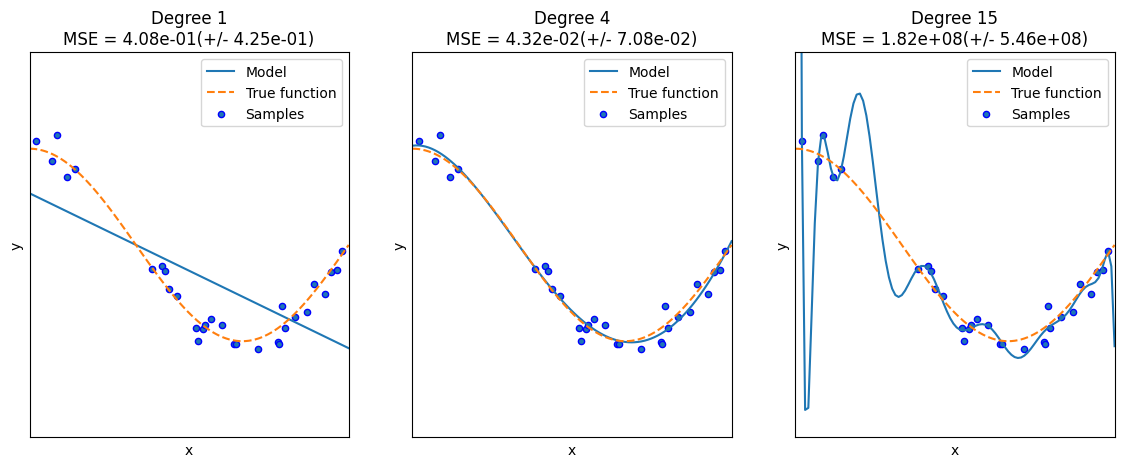

In [51]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()